# Solution Graded Exercise 12: Spatial Working Memory (Compte et. al.)

first name: ...

last name: ...

sciper: ...

date: ...

*Your teammate*

first name of your teammate: ...

last name of your teammate: ...

sciper of your teammate: ...


Note: You are allowed to discuss the concepts with your class mates. You are not allowed to share code. You have to understand every line of code you write in this notebook. We will ask you questions about your submission during a fraud detection session during the last week of the semester.

** Remember **

If you are asked for plots: The appearance of the plots (labelled axes, ** useful scaling **, etc.) is important!

If you are asked for discussions: Answer in a precise way and try to be concise. 


** Submission **

Rename this notebook to Ex12_FirstName_LastName_Sciper.ipynb and upload that single file on moodle before the deadline.

** Link to the exercise **

http://neuronaldynamics-exercises.readthedocs.io/en/latest/exercises/spatial-working-memory.html

## \* \* \* \* IMPORTANT: neurodynex update  \* \* \* \*

This exercise requires an update of the neurodynex package. For the update, please run the following lines in your terminal:

> source activate bmnn
>
> conda update -c brian-team -c epfl-lcn neurodynex

In [4]:
%matplotlib inline
from neurodynex.working_memory_network import wm_model
from neurodynex.tools import plot_tools
import brian2 as b2
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')


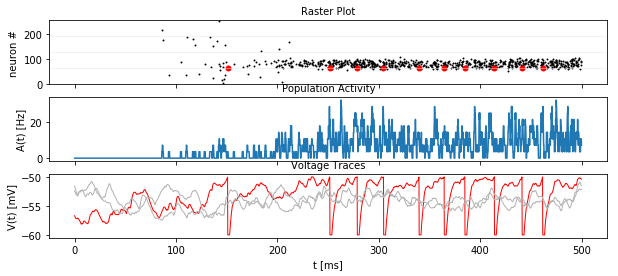

In [3]:
wm_model.getting_started()

# Exercise 12.1. Spontaneous bump formation

### Exercise 12.1.1. Question: External poisson population
1) By default, how many neurons are in the external poisson population?

2) Using the default parameters, what is the average number of spikes/second an excitatory neuron receives from the external population? 
#### [1 + 1  points]

#### 1) In the external poisson population there are 1000 neurons
#### 2) The average number of spikes per second an excitatory neuron receives from the external population is 1.4

3) We use the Brian2 PoissonInput to implement the external population. Which post-synaptic variable is targeted by a presynaptic (poisson) spike?

#### [1  points]

#### The targeted post-synaptic variable is "s_AMPA"

4) The dynamics of that variable are defined in the equations excit_lif_dynamics (still in the source code of simulate_wm). What is the time-scale of that variable (in milliseconds)?

#### [1  points]

#### The time scale of that variable is $\tau_{AMPA} = 1.8\, ms$

### Exercise 12.1.2. Question: Unstructured input

(<Figure size 720x288 with 3 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x10061c88>)

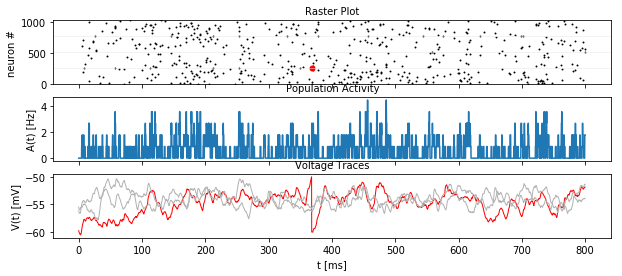

In [6]:
np.random.seed(892)
rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib, voltage_monitor_inhib, idx_monitored_neurons_inhib, w_profile = wm_model.simulate_wm(sim_time=800. * b2.ms, poisson_firing_rate=1.3 * b2.Hz, sigma_weight_profile=20., Jpos_excit2excit=1.6)
plot_tools.plot_network_activity(rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, t_min=0. * b2.ms)


(<Figure size 720x288 with 3 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x12f9c390>)

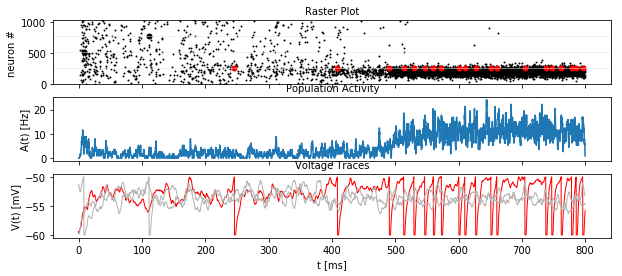

In [7]:
# FIRING RATE CHANGED TO 2.2 Hz
np.random.seed(384)
rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib, voltage_monitor_inhib, idx_monitored_neurons_inhib, w_profile = wm_model.simulate_wm(sim_time=800. * b2.ms, poisson_firing_rate=2.2 * b2.Hz, sigma_weight_profile=20., Jpos_excit2excit=1.6)
plot_tools.plot_network_activity(rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, t_min=0. * b2.ms)

1) Without coding, from the plot: What is the population activity (mean firing rate) of the excitatory population at different points in time?
2) Change the firing rate of the external population to 2.2Hz. What do you observe?

#### [2  + 2  points]

#### 1) From the plot it can be observed that the population activity varies from 0 to 4 Hz; the mean population activity seems to be around 2 Hz.
#### 2) If the frequency is increased to 2.2 Hz, some neurons that are close to the threshold start firing with high rate. Therefore, as it can be seen in the plot, after approximately 500 ms a significant increase of the mean population occurs.  

3) Run the simulation a few times with r_ext = 2.2 Hz. Describe your observations.

#### [2   points]

Simulation 1 out of 4
Simulation 2 out of 4
Simulation 3 out of 4
Simulation 4 out of 4


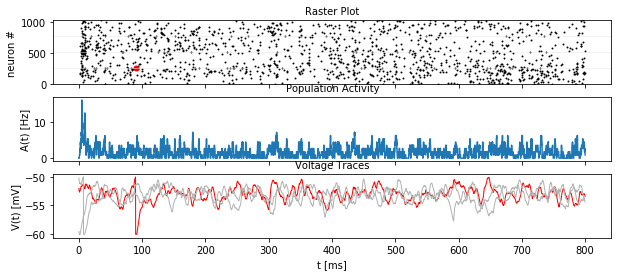

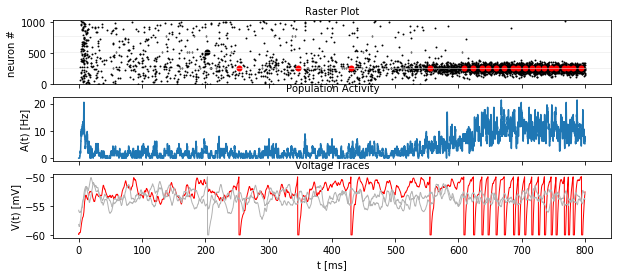

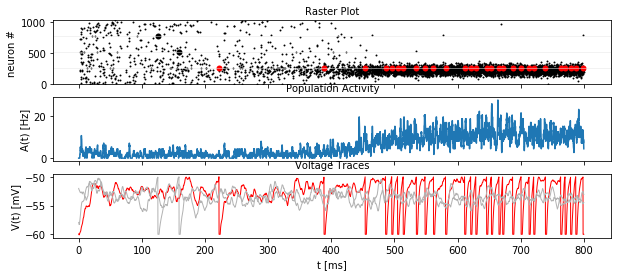

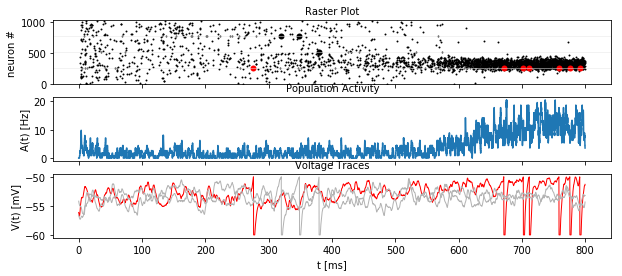

In [8]:
# simulations run with r_ext = 2.2 Hz
for i in range(4):
    np.random.seed(551+i)
    print('Simulation {} out of 4'.format(i+1))
    rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib, voltage_monitor_inhib, idx_monitored_neurons_inhib, w_profile = wm_model.simulate_wm(sim_time=800. * b2.ms, poisson_firing_rate=2.2 * b2.Hz, sigma_weight_profile=20., Jpos_excit2excit=1.6)
    plot_tools.plot_network_activity(rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, t_min=0. * b2.ms)

write your answer

#### The simulations are run with different seeds. From the plots of A(t), it can be observed that generally the population activity increases but not always and not always at the same time: in the first simulation A(t) always oscillates around the same mean, while in the other three the mean increases respectively at around 550 ms, 400 ms and 600 ms. The analysis of the raster plots shows that, when the population activity increases, firing occurs mainly for a subset of neighbouring neurons. Mainly a certain region is excited: indeed neighbouring neurons have the same properties and respond similarly to the same input.

### Exercise 12.1.3. Question: Weight profile

Jpos_excit2excit = 1.6


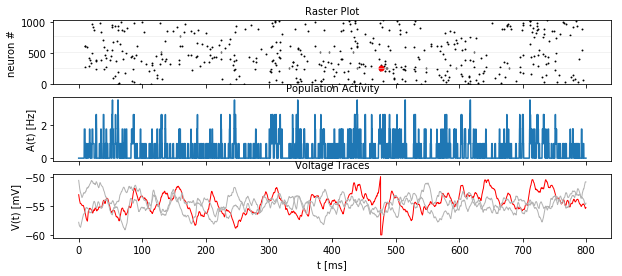

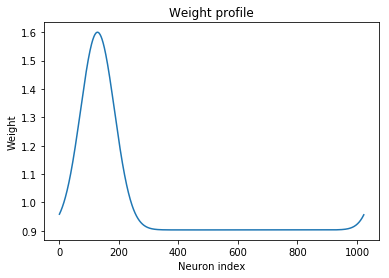

Jpos_excit2excit = 1.8


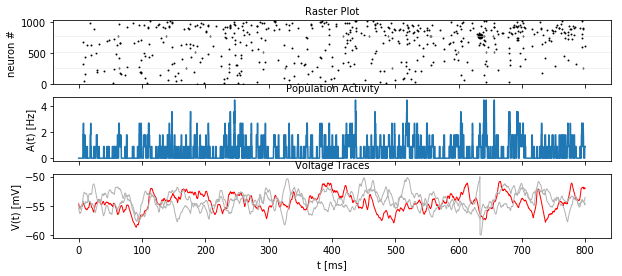

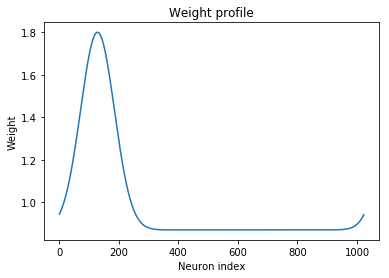

Jpos_excit2excit = 2.0


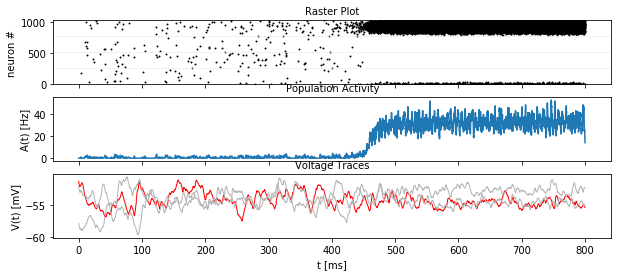

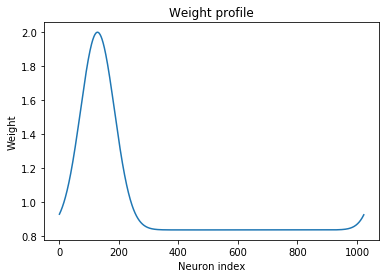

Jpos_excit2excit = 2.3


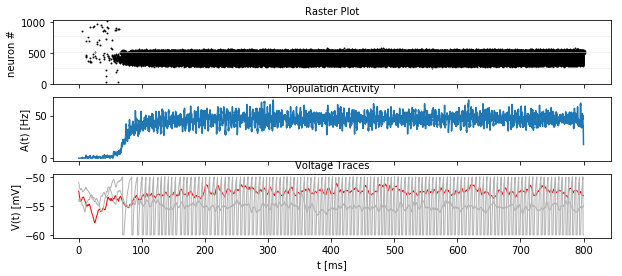

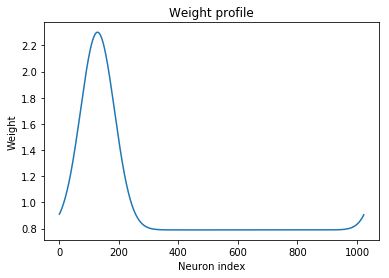

In [13]:
np.random.seed(345)
Jpos = [1.6, 1.8, 2.0, 2.3]
profiles = np.zeros([1024,4])

for i,J in enumerate(Jpos):
    
    rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib, voltage_monitor_inhib, idx_monitored_neurons_inhib, weight_profile_45 = wm_model.simulate_wm(sim_time=800. * b2.ms, poisson_firing_rate=1.3 * b2.Hz, sigma_weight_profile=20., Jpos_excit2excit=J)
    plot_tools.plot_network_activity(rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, t_min=0. * b2.ms)
    profiles[:,i] = weight_profile_45
    print('Jpos_excit2excit = {}'.format(J))
    plt.figure()
    plt.plot(weight_profile_45)
    plt.title('Weight profile')
    plt.xlabel('Neuron index')
    plt.ylabel('Weight')
    plt.show()

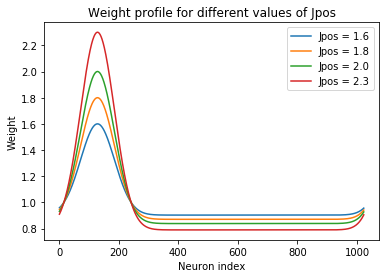

In [12]:
# plot of the weight profiles
x = range(1024)
plt.plot(x, profiles[:,0], label = 'Jpos = 1.6')
plt.plot(x, profiles[:,1], label = 'Jpos = 1.8')
plt.plot(x, profiles[:,2], label = 'Jpos = 2.0')
plt.plot(x, profiles[:,3], label = 'Jpos = 2.3')
plt.legend()
plt.title('Weight profile for different values of Jpos')
plt.xlabel('Neuron index')
plt.ylabel('Weight')
plt.show()

sigma_weight_profile = 5


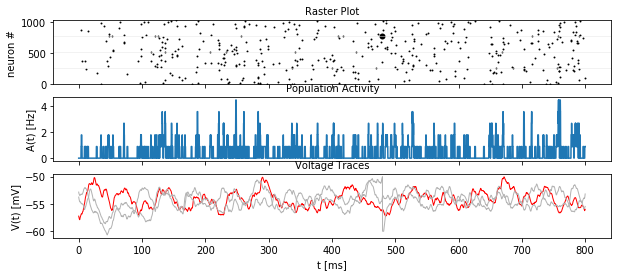

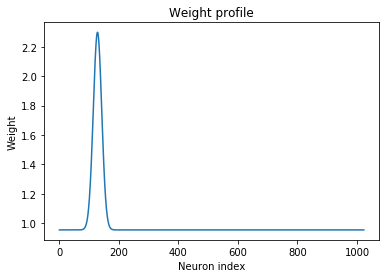

sigma_weight_profile = 10


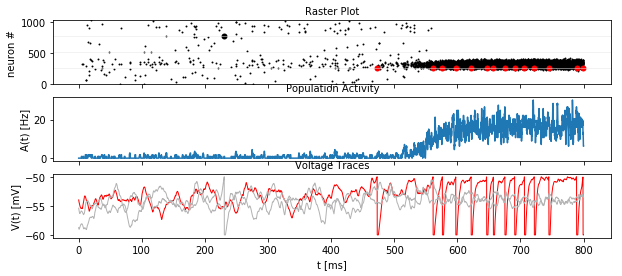

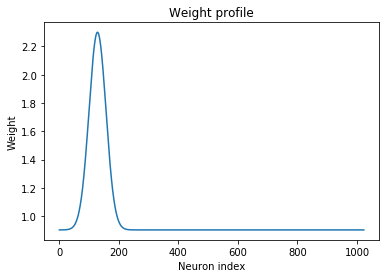

sigma_weight_profile = 15


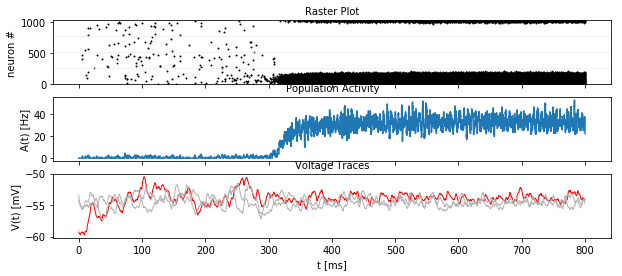

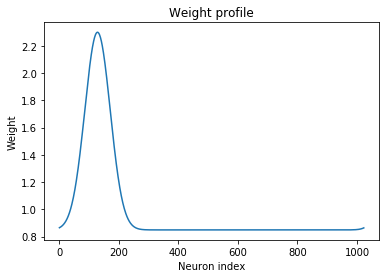

sigma_weight_profile = 20


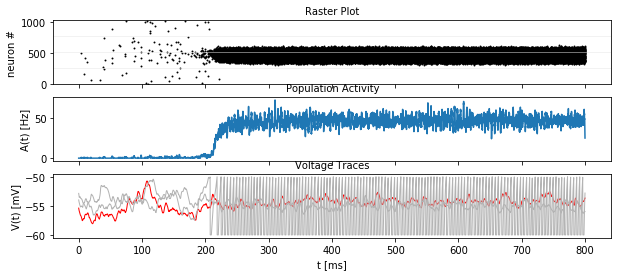

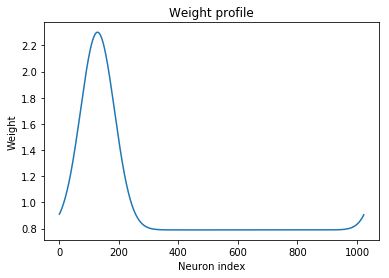

sigma_weight_profile = 30


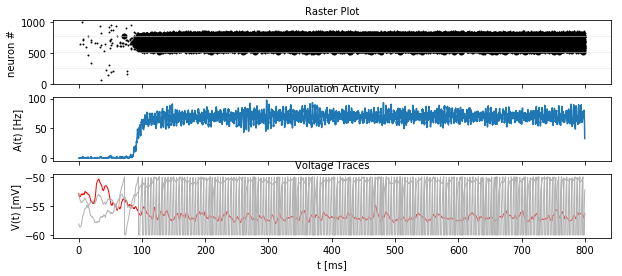

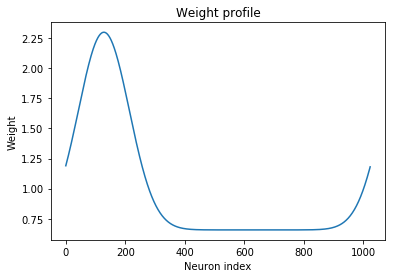

In [17]:
sigmas = [5, 10, 15, 20, 30]
profiles = np.zeros([1024,5])


for i,sigma in enumerate(sigmas):
    
    rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib, voltage_monitor_inhib, idx_monitored_neurons_inhib, weight_profile_45 = wm_model.simulate_wm(sim_time=800. * b2.ms, poisson_firing_rate=1.3 * b2.Hz, sigma_weight_profile=sigma, Jpos_excit2excit=2.3)
    plot_tools.plot_network_activity(rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, t_min=0. * b2.ms)
    profiles[:,i] = weight_profile_45
    
    print('sigma_weight_profile = {}'.format(sigma))
    plt.figure()
    plt.plot(weight_profile_45)
    plt.title('Weight profile')
    plt.xlabel('Neuron index')
    plt.ylabel('Weight')
    plt.show()

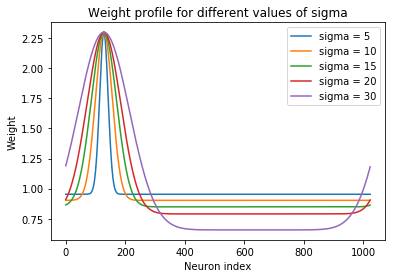

In [18]:
# plot of the weight profiles
x = range(1024)
plt.plot(x, profiles[:,0], label = 'sigma = 5')
plt.plot(x, profiles[:,1], label = 'sigma = 10')
plt.plot(x, profiles[:,2], label = 'sigma = 15')
plt.plot(x, profiles[:,3], label = 'sigma = 20')
plt.plot(x, profiles[:,4], label = 'sigma = 30')
plt.legend()
plt.title('Weight profile for different values of sigma')
plt.xlabel('Neuron index')
plt.ylabel('Weight')
plt.show()

Answer here to the comment questions (max 6 lines overall).

#### [ 5  points]

#### As Jpos increases,  the weight profile presents a higher maximum value, corresponding to exactly the same value of Jpos, and the increase in A(t) occurs earlier in time. In particular, setting Jpos = 2.3 leads to an almost immediate increase of A(t). The abscissae of the max value, as shown in the plot containing the four graphs for different values of Jpos, are not shifted. Furthermore, looking at the long range it can be observed that, if Jpos is increased, the constant region beyond the bump becomes smaller. The area under the curve therefore remains constant. If, instead, the parameter $\it{sigma\_weight\_profile}$ is decreased, the width of the bump becomes narrower, and viceversa. The neuron corresponding to the maximum is the same independently of the parameter. Furthermore the maximum value of the weight is also independent of $\it{sigma\_weight\_profile}$. 

# Exercise 12.2. Network response to a structured input stimulus

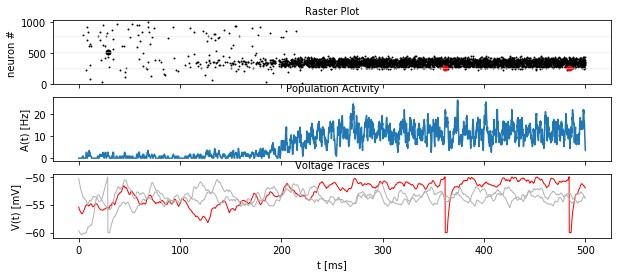

In [30]:

np.random.seed(876)
rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib, voltage_monitor_inhib, idx_monitored_neurons_inhib, w_profile = wm_model.simulate_wm(stimulus_center_deg=120, stimulus_width_deg=30, stimulus_strength=.06 * b2.namp, t_stimulus_start=100 * b2.ms, t_stimulus_duration=200 * b2.ms, sim_time=500. * b2.ms)
fig, ax_raster, ax_rate, ax_voltage = plot_tools.plot_network_activity(rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, t_min=0. * b2.ms)
plt.show()


#### Stimulus strenght = 0.5 namp

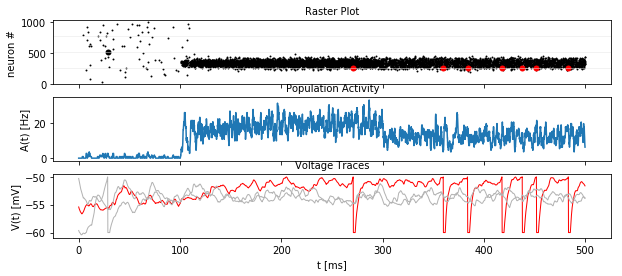

In [26]:
np.random.seed(876)
rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib, voltage_monitor_inhib, idx_monitored_neurons_inhib, w_profile = wm_model.simulate_wm(stimulus_center_deg=120, stimulus_width_deg=30, stimulus_strength=.5 * b2.namp, t_stimulus_start=100 * b2.ms, t_stimulus_duration=200 * b2.ms, sim_time=500. * b2.ms)
fig, ax_raster, ax_rate, ax_voltage = plot_tools.plot_network_activity(rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, t_min=0. * b2.ms)
plt.show()

#### Stimulus width = 60 deg

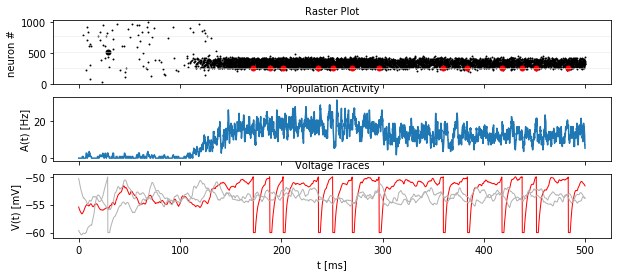

In [31]:
np.random.seed(876)
rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib, voltage_monitor_inhib, idx_monitored_neurons_inhib, w_profile = wm_model.simulate_wm(stimulus_center_deg=120, stimulus_width_deg=60, stimulus_strength=.1 * b2.namp, t_stimulus_start=100 * b2.ms, t_stimulus_duration=200 * b2.ms, sim_time=500. * b2.ms)
fig, ax_raster, ax_rate, ax_voltage = plot_tools.plot_network_activity(rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, t_min=0. * b2.ms)
plt.show()


### Exercise 12.2.1. Question: Integration of input

#### [5  points]

Answer here to the comment questions (max 6 lines overall).

#### A change in the population activity occurs at approximately 200 ms, thus around 100 ms after the stimulus is applied ($\it{t\_stimulus\_start = 100ms}$). At the end of the simulation A(t) oscillates around $\bar{A} = 15 Hz$. Concerning the firing rate across the population at $t = 400 ms$ its plot is a bump having non null values only for the neurons with index $\in [250 , 400]$ , as sketched in the window below. When the stimulus is stronger ($0.5 namp$), the population activity increases just after it is applied and is no more low pass filtered; as the stimulus stops some activity still persists, indicating that the stimulus has been stored in memory. If the stimulus width is $60 deg  ????????

### Sketch of the firing rate across the population at t = 400 ms

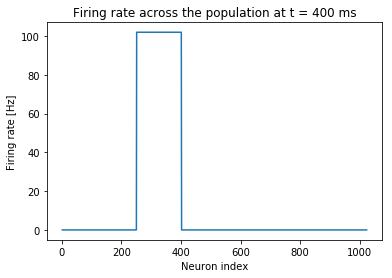

In [58]:
x = np.arange(1,1025)
y = np.zeros(1024)

# From the scatter plot it can be seen that the firing rate is different from zero only in the range (250,400)
# We deduce the amplitude of the bump from the mean population activity

y[250:401] = 15*1024/150

plt.figure()
plt.plot(x,y)
plt.title('Firing rate across the population at t = 400 ms')
plt.xlabel('Neuron index')
plt.ylabel('Firing rate [Hz]')
plt.show()

### Exercise 12.2.2. Question: Role of the inhibitory population

#### [2+1+1+2  points]

Before running the simulation: What do you expect to see? (max 2 lines)

#### The response of an excitatory neuron is given by two terms: the input from the excitatory population, and that from the inhibitory one, added up with negative weights. Therefore, when the inhibitory population is removed, a higher population activity is expected to be found . 

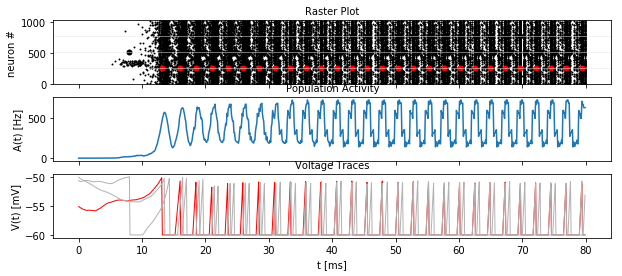

In [32]:
# write your code here
np.random.seed(435)
rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib, voltage_monitor_inhib, idx_monitored_neurons_inhib, w_profile = wm_model.simulate_wm(stimulus_center_deg=120, stimulus_width_deg=30, stimulus_strength=.65 * b2.namp, t_stimulus_start=5 * b2.ms, t_stimulus_duration=25 * b2.ms, sim_time=80. * b2.ms,N_inhibitory=1)
fig, ax_raster, ax_rate, ax_voltage = plot_tools.plot_network_activity(rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, t_min=0. * b2.ms)
plt.show()

#### From the plot it can be seen that the population activity is much higher than when the inhibitory population is active.

Now run again a “normal” simulation:

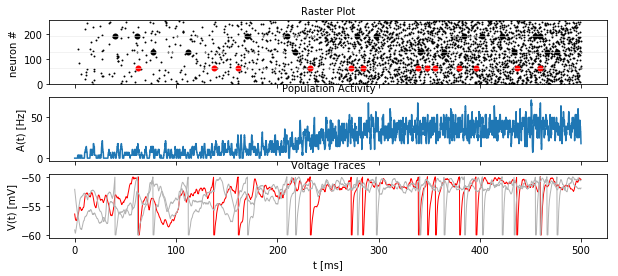

In [33]:
rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib, voltage_monitor_inhib, idx_monitored_neurons_inhib, w_profile = wm_model.simulate_wm(stimulus_center_deg=120, stimulus_width_deg=30, stimulus_strength=.06 * b2.namp, t_stimulus_start=100 * b2.ms, t_stimulus_duration=200 * b2.ms, sim_time=500. * b2.ms)
fig, ax_raster, ax_rate, ax_voltage = plot_tools.plot_network_activity(rate_monitor_inhib, spike_monitor_inhib, voltage_monitor_inhib, t_min=0. * b2.ms)
plt.show()

What is the role of the inhibitory population? (max 2 lines)

#### The role of the inhibitory population is to send a negative input to the excitatory population, which compensates the excitatory input, thus resulting in the avoidance of an explosion of the population activity.

# Exercise 12.3: Decoding the population activity into a population vector

### Exercise 12.3.1. Mapping the neuron index onto its preferred direction

#### [3 points]

In [34]:
# write your code here
def get_orientation(idx_list,N):
    K = len(idx_list)
    deg_list = np.zeros(K)
    for k,val in enumerate(idx_list):
        deg_list[k] = 360./N*(val+1)-180./N
    return deg_list
    
print(get_orientation([0,1,5,10],11))
print(get_orientation([0,1,499,500,999],1000))

[  16.36363636   49.09090909  180.          343.63636364]
[  1.80000000e-01   5.40000000e-01   1.79820000e+02   1.80180000e+02
   3.59820000e+02]


### Exercise 12.3.2. Extracting spikes from the spike monitor


#### [ 4  points]

In [35]:
# modify the following code
def get_spike_count(spike_monitor, spike_index_list, t_min, t_max):
    nr_neurons = len(spike_index_list)
    spike_count_list = np.zeros(nr_neurons)
    spike_trains = spike_monitor.spike_trains()
    for i,neuron in enumerate(spike_index_list):
    # loop over the list of neurons and get the spikes within the time window:
        spike_count_list[i] = np.sum((spike_trains[i]>=t_min) & (spike_trains[i]<(t_max)))
    return spike_count_list



In [49]:
np.random.seed(556)
rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib, voltage_monitor_inhib, idx_monitored_neurons_inhib, w_profile = wm_model.simulate_wm(stimulus_center_deg=120, stimulus_width_deg=30, stimulus_strength=.06 * b2.namp, t_stimulus_start=100 * b2.ms, t_stimulus_duration=200 * b2.ms, sim_time=500. * b2.ms)


Text(0,0.5,'Spike rate [Hz]')

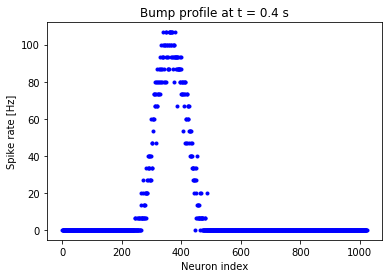

In [54]:
import matplotlib.pyplot as plt

t = 400*b2.ms  # time point of interest
t_window = 150*b2.ms # width of the window over which the average is taken

t_min = t-t_window/2
t_max = t+t_window/2
spike_counts = get_spike_count(spike_monitor_excit, idx_monitored_neurons_excit, t_min, t_max)
spike_rates = spike_counts/(t_max-t_min)/b2.second
plt.plot(spike_rates, ".b")
plt.title("Bump profile at t = {}".format(t))
plt.xlabel("Neuron index")
plt.ylabel("Spike rate [Hz]")

### Exercise 12.3.3. Computing the population vector

#### [3  points]

In [59]:
def get_theta_time_series(spike_monitor, idx_monitored_neurons, t_snapshots, t_window_width):
    idx_series = np.zeros(len(t_snapshots))
    for i,t_snap in enumerate(t_snapshots):  
        t_min = t_snap-t_window_width/2
        t_max = t_snap+t_window_width/2
        spike_count_list = get_spike_count(spike_monitor, idx_monitored_neurons, t_min, t_max)
        idx_series[i] = idx_monitored_neurons[np.argmax(spike_count_list)]
    return get_orientation(idx_series,len(idx_monitored_neurons) ) 

#### Population vector at the time the stimulation ends

In [68]:
# t_stimulus_end = 300 ms
theta_stimulus_end = get_theta_time_series(spike_monitor_excit,idx_monitored_neurons_excit,[300*b2.ms],100*b2.ms)
print(theta_stimulus_end)
print("The population vector found is, as expected, very close to the stimulus location")

[ 123.22265625]
The population vector found is, as expected, very close to the stimulus location


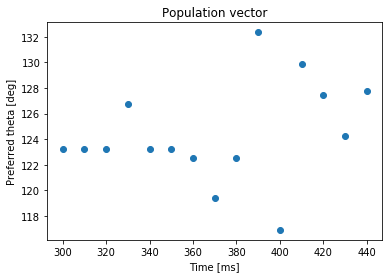

In [79]:
t_window_width = 100 *b2.ms
t_stimulus_start = 100 *b2.ms
t_stimulus_duration = 200 *b2.ms
t_sim = 500 *b2.ms
snapshot_interval = 10 *b2.ms

# Example how to create an array of timestamps spaced by snapshot_interval in the interval of interest.
t_snapshots = range(
    int(np.floor((t_stimulus_start+t_stimulus_duration)/b2.ms)),  # lower bound
    int(np.floor((t_sim-t_window_width/2)/b2.ms)),  # Subtract half window. Avoids an out-of-bound error later.
    int(round(snapshot_interval/b2.ms))  # spacing between time stamps
    )*b2.ms

# how your function get_theta_time_series could be called:
theta_ts = get_theta_time_series(spike_monitor_excit, idx_monitored_neurons_excit, t_snapshots, t_window_width)

# plot theta vs time using pyplot
#import matplotlib.pyplot as plt
plt.plot(t_snapshots/b2.ms, theta_ts,'o')
plt.title('Population vector')
plt.xlabel('Time [ms]')
plt.ylabel('Preferred theta [deg]')
plt.show()

### Exercise 12.3.4. Exercise: Visualize the diffusion of the population vector

#### [3 (coding) + 2 (discussion) points]

#### N_excitatory = 2048

Simulation 1 out of 3
Simulation 2 out of 3
Simulation 3 out of 3


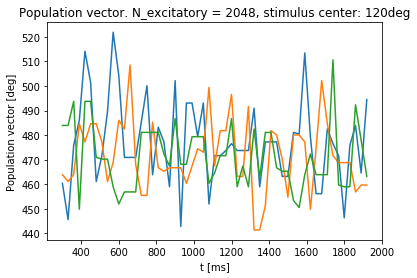

In [87]:
# write your code here
simulations = 3
t_window_width = 150 *b2.ms
t_stimulus_start = 100 *b2.ms
t_stimulus_duration = 200 *b2.ms
t_sim = 2000 *b2.ms
snapshot_interval = 30 *b2.ms

# Example how to create an array of timestamps spaced by snapshot_interval in the interval of interest.
t_snapshots = range(
    int(np.floor((t_stimulus_start+t_stimulus_duration)/b2.ms)),  # lower bound
    int(np.floor((t_sim-t_window_width/2)/b2.ms)),  # Subtract half window. Avoids an out-of-bound error later.
    int(round(snapshot_interval/b2.ms))  # spacing between time stamps
    )*b2.ms

for i in range(simulations):
    print("Simulation {} out of {}".format(i+1,simulations))
    np.random.seed(876 + i)
    rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib, voltage_monitor_inhib, idx_monitored_neurons_inhib, w_profile = wm_model.simulate_wm(N_excitatory=2048,N_inhibitory=512,weight_scaling_factor=1.0,stimulus_center_deg=120, stimulus_width_deg=30, stimulus_strength=.06*b2.namp, t_stimulus_start=100*b2.ms , t_stimulus_duration= 200*b2.ms, sim_time=t_sim)
    theta_ts = get_theta_time_series(spike_monitor_excit, idx_monitored_neurons_excit, t_snapshots, t_window_width)
    plt.plot(t_snapshots/b2.ms, theta_ts)

plt.title('Population vector. N_excitatory = 2048, stimulus center: 120deg')
plt.xlabel('t [ms]')
plt.ylabel('Population vector [deg]')    
plt.show()

#### N_excitatory = 512

Simulation 1 out of 3
Simulation 2 out of 3
Simulation 3 out of 3


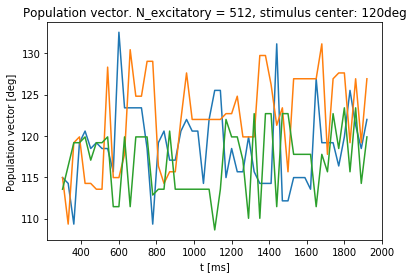

In [86]:
# write your code here
simulations = 3
t_window_width = 150 *b2.ms
t_stimulus_start = 100 *b2.ms
t_stimulus_duration = 200 *b2.ms
t_sim = 2000 *b2.ms
snapshot_interval = 30 *b2.ms

# Example how to create an array of timestamps spaced by snapshot_interval in the interval of interest.
t_snapshots = range(
    int(np.floor((t_stimulus_start+t_stimulus_duration)/b2.ms)),  # lower bound
    int(np.floor((t_sim-t_window_width/2)/b2.ms)),  # Subtract half window. Avoids an out-of-bound error later.
    int(round(snapshot_interval/b2.ms))  # spacing between time stamps
    )*b2.ms

for i in range(simulations):
    print("Simulation {} out of {}".format(i+1,simulations))
    np.random.seed(876 + i)
    rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib, voltage_monitor_inhib, idx_monitored_neurons_inhib, w_profile = wm_model.simulate_wm(N_excitatory=512,N_inhibitory=128,weight_scaling_factor=4.0,stimulus_center_deg=120, stimulus_width_deg=30, stimulus_strength=.06*b2.namp, t_stimulus_start=100*b2.ms , t_stimulus_duration= 200*b2.ms, sim_time=t_sim)
    theta_ts = get_theta_time_series(spike_monitor_excit, idx_monitored_neurons_excit, t_snapshots, t_window_width)
    plt.plot(t_snapshots/b2.ms, theta_ts)

plt.title('Population vector. N_excitatory = 512, stimulus center: 120deg')
plt.xlabel('t [ms]')
plt.ylabel('Population vector [deg]')    
plt.show()

*Write your obeservation here (max 4 lines)* 

#### From the comparison between the two plots it can be observed that for a greater number of neurons ($N_{excit} = 2048$) the population vector fluctuates more with respect to the system consisting of a smaller number of neurons ($N_{excit} = 512$): in the former case the variation range is $(90, 160)$, while in the latter the range is $(110, 130)$. In both cases the average per simulation is around 120 deg. 

# Exercise 12.4. Reading exercise: slow and fast channels

### Exercise 12.4.1.

#### [2 points]
Write your answer here (max 2 lines).

#### The time constant of the fast rise is $\tau = 1.88 ms$ while the timescale of the slow decay is $\tau = 65 ms$

# Exercise 12.5: Effect of disinhibition on the bump shape
### *** Note:*** this exercise is not available online, all necessary information is given here.

In this exercise we will try to reproduce the results of the paper "*Linking Microcircuit Dysfunction to Cognitive Impairment: Effects of Disinhibition Associated with Schizophrenia in a Cortical Working Memory Model*" (https://academic.oup.com/cercor/article/24/4/859/321897). 
As you can read in the abstract, "Excitation–Inhibition balance (E/I balance) is a fundamental property of cortical microcircuitry. Disruption of E/I balance in prefrontal cortex is hypothesized to underlie cognitive deficits observed in neuropsychiatric illnesses such as schizophrenia". 
In order to understand this exerise, you do not need to read the full paper, but you will need to get a general understanding of the research topic (we recommend to read the abstract) and a detailed understanding of figures  1, 2 and 5 (make sure you understand the meaning of the quantities involved in those plots).

In this paper, the authors pharmacologically alter the E/I balance in the prefrontal cortex through the use of a drug which reduces the conductance of the excitatory-to-inhibitory  synapses, $G_{EI}$. 
In this way, the inhibitory neurons are less activated and therefore the excitatory neurons are disinhibited. 
In other words, they pharmacologically induce the specific symptoms they what to understand.

More interestingly, from our perspective, they use an analogous model that you have been using so far in order to understand **why** disinhibition is associated with some of the symptons of schizophrenia, such as a reduced ability of keeping the focus on a fixation point. 

**Note:**  In what follows we will reproduce qualitatively some of the results shown in the paper's figures. However a perfect match between numerical values cannot be achieved as our neural network slightly differs from that of the paper.

### Exercise 12.5.1
#### [4 points]
As a starting point, we can see qualitatively the effect of disinhibition on the bump width by running the simulation with two different values of $G_{EI}$ (in the code, $G_{EI}$ is "G_excit2inhib"). The plot should be qualitatively similar to Fig. 2.A of the paper.

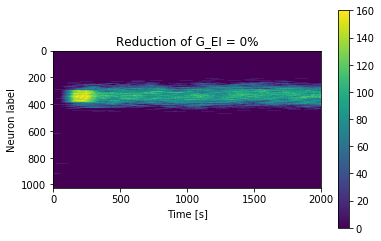

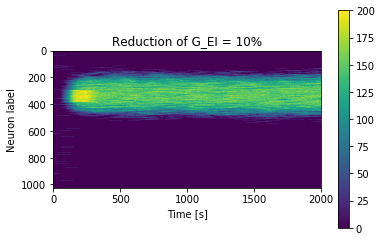

In [88]:

from math import ceil, floor


def get_rate_neuron(spike_monitor,monitored_neurons, sim_time,step,time_window):
    times = np.linspace(0,sim_time/b2.ms,(sim_time/step)+1)
    rate_array = np.zeros([len(times),len(monitored_neurons)])
    for i,t in enumerate(times):
        t_min = np.max([0, t*b2.ms-time_window/2])
        t_max = np.min([sim_time, t*b2.ms+time_window/2])
        spike_counts = get_spike_count(spike_monitor,monitored_neurons,t_min*b2.second,t_max*b2.second)
        rate_array[i,:] = spike_counts/(t_max-t_min)/b2.second
        
    return rate_array.transpose()


G_EI = [122.64 , (1 - 0.1)*122.64] * b2.psiemens
g_ei_perc = [0,10]

for i,g in enumerate(G_EI):
    np.random.seed(876)
    rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib, voltage_monitor_inhib, idx_monitored_neurons_inhib, w_profile = wm_model.simulate_wm(stimulus_center_deg=120, stimulus_width_deg=30, stimulus_strength=.3 * b2.namp, t_stimulus_start=100 * b2.ms, t_stimulus_duration=200 * b2.ms, sim_time=2000. * b2.ms,G_excit2inhib= g)
    rate_matrix = get_rate_neuron(spike_monitor_excit,idx_monitored_neurons_excit,2000.*b2.ms,1.*b2.ms,100.*b2.ms)
    plt.figure()
    plt.imshow(rate_matrix)
    plt.colorbar()
    plt.xlabel('Time [s]')
    plt.ylabel('Neuron label')
    plt.title('Reduction of G_EI = {}%'.format(g_ei_perc[i]))
    plt.show()




### Exercise 12.5.2
#### [5 points]

In exercise 12.3.2 you plotted the profile of the bump. Starting from the the bump profile, write the function bump_width() that measures the bump's width. In order to measure the width of the bump, we take the full width at half maximum.  

In [89]:
# this function is useful to compute the bump width
def find_nearest_argmin(array,value):
    idx = (np.abs(array-value)).argmin()
    return idx 


def bump_width(spike_counts, t_max, t_min):  
    spike_rates = spike_counts/(t_max - t_min)/b2.second   # use the function get_spike_count
    half_max_rate = np.max(spike_rates)/2
    peak_position = np.argmax(spike_rates)
    left_bump_boundary =  find_nearest_argmin(spike_rates[0:peak_position],half_max_rate) # use the find_nearest_argmin to determine the left bump boundary
    right_bump_boundary =peak_position + find_nearest_argmin(spike_rates[peak_position+1:],half_max_rate) # use the find_nearest_argmin to determine the right bump boundary
    bump_size = right_bump_boundary - left_bump_boundary
    return bump_size

### Exercise 12.5.3
#### [ 6 (for the simulation) + 6 (for the plots) points]
In this exercise we reproduce figures 2.C and 2.D of the paper. 

You will need to use the fucntion bump_width() to plot the bump's width vs the decrease of $G_{EI}$ in percentage, in order to reproduce Fig. 2.C of the paper.

On the other hand you will need to use the function get_theta_time_series, in order to extract the poplation vector (which in the paper is called $\theta_{report}$ or just "report"). 
It is important to chose a proper time bin (such that you filter out the oscillations, but you can still capture the drift of the population vector).

**Parameters for the stimulus:** N_excitatory=1024, N_inhibitory=256, stimulus_center_deg=180, stimulus_width_deg=40, stimulus_strength=0.3 namp, t_stimulus_start=10 ms, t_stimulus_duration=100 ms, distractor_center_deg=120, distractor_width_deg=0, distractor_strength=0. namp, t_distractor_start=0 ms, t_distractor_duration=0 ms, G_excit2inhib = (1. - ?) .35 x 1.2 x 0.292  nS, sim_time=500. ms

**Making the plots**

In the same for-loop (on differnt values of $G_{EI}$) you can store the bump's width, population vector for the excitatory group and that of the inhibitory group. This will allow  you to save computational time! 
Then make two plots corresponding to Fig. 2.C and 2.D. 

In [90]:
np.random.seed(577)
t_min = 350. * b2.ms
t_max = 450. * b2.ms


resolution=10   # how many data points we want in the graph
n_trials=5   # number of trial on which we average every point in the graph
disinhibition_level=np.linspace(0.,0.14, resolution)   # define the range of values of the disinhibition

# here we initialize the arrays in which we are goint to store the quantity we need to plot
bump_w=np.array([0.]*resolution)
bump_std=np.array([0.]*resolution)

firing_rate_E=np.array([0.]*resolution)
firing_rate_E_std=np.array([0.]*resolution)

firing_rate_I=np.array([0.]*resolution)
firing_rate_I_std=np.array([0.]*resolution)

for i in range(resolution):
    print("Resolution number {} out of {}".format(i+1,resolution))
    bump_width_local=[0]*n_trials
    for j in range(n_trials):
        print('Trial number {} out of {}'.format(j+1,n_trials))
        rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib, voltage_monitor_inhib, idx_monitored_neurons_inhib, w_profile = wm_model.simulate_wm(N_excitatory=1024, N_inhibitory=256, stimulus_center_deg=180, stimulus_width_deg=40, stimulus_strength=0.3 *b2.namp, t_stimulus_start=10 *b2.ms, t_stimulus_duration=100 *b2.ms, distractor_center_deg=120, distractor_width_deg=0, distractor_strength=0. *b2.namp, t_distractor_start=0 *b2.ms, t_distractor_duration=0 *b2.ms, G_excit2inhib = (1. - disinhibition_level[i]) *.35 * 1.2 * 0.292  *b2.nS, sim_time=500. *b2.ms)
        spike_counts = get_spike_count(spike_monitor_excit, idx_monitored_neurons_excit, t_min, t_max)
        angle_degree = 1024/360.  # neural index to angle scaling factor 
        bump_width_local[j]= bump_width(spike_counts, t_max, t_min)
        
    bump_w[i]= np.mean(bump_width_local) # compute the mean of the bump_width_local
    bump_std[i]= np.std(bump_width_local) # compute the std of the bump_width_local
    
    # here we extract the rates from the monitors
    rate_excit = rate_monitor_excit.smooth_rate(window="flat", width=0.5*b2.ms)/b2.Hz
    rate_inhib = rate_monitor_inhib.smooth_rate(window="flat", width=0.5*b2.ms)/b2.Hz
    
    firing_rate_E[i] = np.mean(rate_excit[np.int(len(rate_excit)*0.8):]) # compute the mean of rate_excit over the last 20% of entries 
    firing_rate_E_std[i] = np.std(rate_excit[np.int(len(rate_excit)*0.8):]) # compute the std of rate_excit over the last 20% of entries 
    
    firing_rate_I[i] = np.mean(rate_inhib[np.int(len(rate_excit)*0.8):]) # compute the mean of rate_inhib over the last 20% of entries
    firing_rate_I_std[i] = np.std(rate_inhib[np.int(len(rate_excit)*0.8):]) # compute the std of rate_inhib over the last 20% of entries  

Resolution number 1 out of 10
Trial number 1 out of 5
Trial number 2 out of 5
Trial number 3 out of 5
Trial number 4 out of 5
Trial number 5 out of 5
Resolution number 2 out of 10
Trial number 1 out of 5
Trial number 2 out of 5
Trial number 3 out of 5
Trial number 4 out of 5
Trial number 5 out of 5
Resolution number 3 out of 10
Trial number 1 out of 5
Trial number 2 out of 5
Trial number 3 out of 5
Trial number 4 out of 5
Trial number 5 out of 5
Resolution number 4 out of 10
Trial number 1 out of 5
Trial number 2 out of 5
Trial number 3 out of 5
Trial number 4 out of 5
Trial number 5 out of 5
Resolution number 5 out of 10
Trial number 1 out of 5
Trial number 2 out of 5
Trial number 3 out of 5
Trial number 4 out of 5
Trial number 5 out of 5
Resolution number 6 out of 10
Trial number 1 out of 5
Trial number 2 out of 5
Trial number 3 out of 5
Trial number 4 out of 5
Trial number 5 out of 5
Resolution number 7 out of 10
Trial number 1 out of 5
Trial number 2 out of 5
Trial number 3 out of 

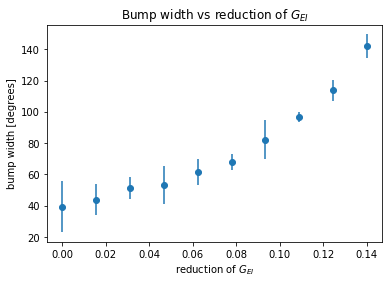

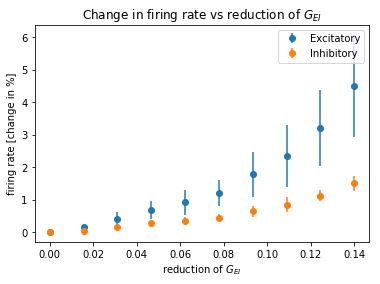

In [100]:

# reproducing Fig 2.C of the paper: 
# plot the bump_width vs disinhibition_level +- its std
plt.figure()
y = get_orientation(bump_w,len(idx_monitored_neurons_excit))
plt.errorbar(disinhibition_level,y,bump_std,fmt = 'o')
plt.title('Bump width vs reduction of $G_{EI}$')   
plt.xlabel(r'reduction of $G_{EI}$')
plt.ylabel('bump width [degrees]')
plt.show()

# reproducing Fig 2.D of the paper
# plot the change in firing rates vs disinhibition_level +- its std. 
#Let's start with the excitatory population.

# first you need to express the firing rates changes in percentage
firing_rate_E_perc = (firing_rate_E-float(firing_rate_E[0]))/firing_rate_E[0]

# and the std
firing_rate_E_std_perc = (firing_rate_E_std - float(firing_rate_E_std[0]))/firing_rate_E_std[0]

# plot the firing rate change of the exc pop +- its std dev
plt.figure()
plt.errorbar(disinhibition_level,firing_rate_E_perc,firing_rate_E_std_perc,fmt = 'o',label='Excitatory')

# repeat the same passages for the inhibitory population

firing_rate_I_perc = (firing_rate_I-float(firing_rate_I[0]))/firing_rate_I[0]
firing_rate_I_std_perc = (firing_rate_I_std-float(firing_rate_I_std[0]))/firing_rate_I_std[0]

plt.errorbar(disinhibition_level,firing_rate_I_perc,firing_rate_I_std_perc,fmt = 'o',label='Inhibitory')

plt.title('Change in firing rate vs reduction of $G_{EI}$')
plt.xlabel(r'reduction of $G_{EI}$')
plt.ylabel('firing rate [change in %]')
plt.legend()
plt.show()


# Exercise 12.6
In this exercise we study the combined effect of a distractor and disinhibition. Therefore we will focus on Fig. 5 of the paper.

### Exercise 12.6.1
#### [4 points]
Reproduce Fig. 5.A: use the proper keywords in the function simulate_wm in order to introduce a distractor in the system. Choose a value of the keyword "distractor_center_deg" and two values of $G_{EI}$ such that you qualitatively reproduce Fig. 5.A.

**Hint:** For the control case we use the default value of $G_{EI}$ and in the disinhibition case we lower that value by 10%. Simulate for 500ms (keyword sim_time).

**Stimulus parameters:** N_excitatory=1024, N_inhibitory=256, stimulus_center_deg=90, stimulus_width_deg=40, stimulus_strength=0.3 namp, t_stimulus_start=10 ms, t_stimulus_duration=100 ms

**Distractor parameters:** The distractor should have the same strenght, width and duration as the stimulus and should kick in 200ms after the stimulus starts. The position of the distract should be 90˚ higher than the stimulus, just as in the paper figure.

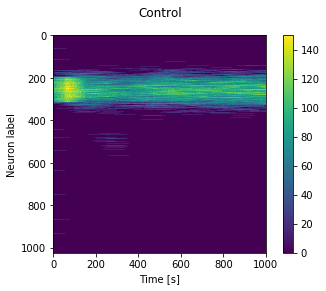

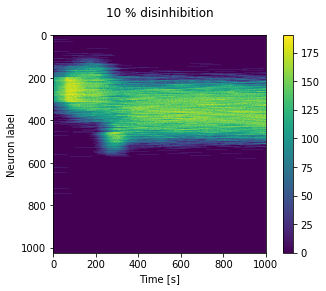

In [103]:
np.random.seed(145)

# Reproduction of plot 5A in paper
# raster plot bump with distractor for control case
rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib, voltage_monitor_inhib, idx_monitored_neurons_inhib, w_profile = wm_model.simulate_wm( N_excitatory=1024, N_inhibitory=256, stimulus_center_deg=90, stimulus_width_deg=40, stimulus_strength=0.3 *b2.namp, t_stimulus_start=10 *b2.ms, t_stimulus_duration=100 *b2.ms,sim_time = 1000 * b2.ms, distractor_center_deg=180, distractor_width_deg=40, distractor_strength=0.3 *b2.namp, t_distractor_start=210*b2.ms, t_distractor_duration=100*b2.ms,G_excit2inhib=122.64 * b2.psiemens)
rate_matrix = get_rate_neuron(spike_monitor_excit, idx_monitored_neurons_excit,1000*b2.ms,1*b2.ms,100*b2.ms )
plt.figure()
plt.imshow(rate_matrix)
plt.suptitle("Control")
plt.colorbar()
plt.xlabel('Time [s]')
plt.ylabel('Neuron label')
plt.show()


# raster plot bump with distractor with disinhibition
rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib, voltage_monitor_inhib, idx_monitored_neurons_inhib, w_profile = wm_model.simulate_wm( N_excitatory=1024, N_inhibitory=256, stimulus_center_deg=90, stimulus_width_deg=40, stimulus_strength=0.3 *b2.namp, t_stimulus_start=10 *b2.ms, t_stimulus_duration=100 *b2.ms, distractor_center_deg=180, distractor_width_deg=40, distractor_strength=0.3 *b2.namp, t_distractor_start=210*b2.ms, t_distractor_duration=100*b2.ms,sim_time=1000 * b2.ms,G_excit2inhib=(1-0.1) * 122.64 * b2.psiemens)
rate_matrix = get_rate_neuron(spike_monitor_excit, idx_monitored_neurons_excit,1000*b2.ms,1*b2.ms,100*b2.ms )
plt.figure()
plt.imshow(rate_matrix)
plt.suptitle("10 % disinhibition")
plt.colorbar()
plt.xlabel('Time [s]')
plt.ylabel('Neuron label')
plt.show()


### Exercise 12.6.2
#### [8 (for the coding) + 6 (for plots) + 3 (for the discussion) points]
1) Use the function "get_theta_time_series" as you did in exercise 5.3 in order to compute $\theta_{report}$ for different positions of the distractor and for 3 values of $G_{EI}$ such that $G_{EI}$ is reduced by 0,7 and 14 % respectively. 

2) Reproduce Fig. 5.B: Plot $\theta_{report}$ as a function of the distractor position for a variation of $G_{EI}$ of 0, 7 and 14% (3 curves).

3) Comment the graph you made in point 2: how can we interpret the curves? How can we explain their shapes? Why is the maximum of each curve shifted to the right in the case of disinhibition? (Max 10 lines)

In [109]:
b2.defaultclock.dt = 0.05 * b2.ms
t_sim= 500 * b2.ms

t_stimulus_start = 10 * b2.ms
t_stimulus_duration = 100 *b2.ms
stimulus_center_deg = 90
stimulus_width_deg = 40
stimulus_strength = 0.3 * b2.namp

t_distractor_start = 210 * b2.ms
t_distractor_duration = 100 *b2.ms
distractor_width_deg = 40
distractor_strength = 0.3 * b2.namp

# distractor angles
rel_distr_angles = np.array([0, 25, 50, 75, 100, 125, 150, 175])
distr_angles = rel_distr_angles + stimulus_center_deg

# synaplse relevant for disinhibtion,  this will also be looped over in the following
disinhib_percentages = np.array([ 0,7,14 ]) # enter here the correct disinhibition percentages   
G_excit2inhib_control =  .35 * 1.2 * 0.292 * b2.nS

N_excit = 512
N_inhib = 128
weight_scaling = 4

t_window_length = 100 * b2.ms
snapshot_interval = 20 * b2.ms
n_trials = 4 # increase or decrease the number of trials on the base of the tradeoff between the simulation time and the quality of the outcome

t_snapshots = range(int(np.floor((t_stimulus_start+t_stimulus_duration-t_window_length)/b2.ms)), int(np.ceil((t_sim-t_window_length)/b2.ms)), int(round(snapshot_interval/b2.ms)))*b2.ms
report = [[[[] for i in range(n_trials)] for j in range(len(distr_angles))] for k in range(len(disinhib_percentages))]
distractibility_windows = [[] for i in range(len(disinhib_percentages))]

for k in range(len(disinhib_percentages)):
    G_excit2inhib = G_excit2inhib_control * disinhib_percentages[k]
    # set the correct value of G_EI (given G_excit2inhib_control and the disinhib_percentages)
    
    for i in range(len(distr_angles)):
        distractor_center_deg = distr_angles[i] # set the correct value of the distractor angular position
        
        for j in range(n_trials):
            print('Disinhib_percentages number {}, distr_angle number {}, trial number {}'.format(k+1,i+1,j+1))
            rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib, voltage_monitor_inhib, idx_monitored_neurons_inhib, w_profile  = wm_model.simulate_wm(N_excitatory = N_excit, N_inhibitory = N_inhib, weight_scaling_factor = weight_scaling,
                    stimulus_center_deg=stimulus_center_deg, stimulus_width_deg=stimulus_width_deg, stimulus_strength=stimulus_strength,
                    t_stimulus_start=t_stimulus_start, t_stimulus_duration=t_stimulus_duration,
                    distractor_center_deg=distractor_center_deg, distractor_width_deg=distractor_width_deg, distractor_strength=distractor_strength,
                    t_distractor_start=t_distractor_start, t_distractor_duration=t_distractor_duration,
                    G_excit2inhib = G_excit2inhib,
                    sim_time=t_sim)
            
            theta_list = get_theta_time_series( spike_monitor_excit, idx_monitored_neurons_excit, t_snapshots, t_window_length ) # extract the population vector as before
            report[k][i][j] = np.mean(theta_list[np.int(0.9*len(theta_list)):]) # compute the mean of theta_list over the last 10% of entries 

# average over repetitions/initializations
report_averaged = np.mean(report,axis=2) # compute the mean of the report. Hint: use the keyword axis = 2
report_std = np.std(report,axis=2) # compute the std of the report. Hint: use the keyword axis = 2                                

Disinhib_percentages number 1, distr_angle number 1, trial number 1
Disinhib_percentages number 1, distr_angle number 1, trial number 2
Disinhib_percentages number 1, distr_angle number 1, trial number 3
Disinhib_percentages number 1, distr_angle number 1, trial number 4
Disinhib_percentages number 1, distr_angle number 2, trial number 1
Disinhib_percentages number 1, distr_angle number 2, trial number 2
Disinhib_percentages number 1, distr_angle number 2, trial number 3
Disinhib_percentages number 1, distr_angle number 2, trial number 4
Disinhib_percentages number 1, distr_angle number 3, trial number 1
Disinhib_percentages number 1, distr_angle number 3, trial number 2
Disinhib_percentages number 1, distr_angle number 3, trial number 3
Disinhib_percentages number 1, distr_angle number 3, trial number 4
Disinhib_percentages number 1, distr_angle number 4, trial number 1
Disinhib_percentages number 1, distr_angle number 4, trial number 2
Disinhib_percentages number 1, distr_angle numbe

Disinhib_percentages number 4, distr_angle number 7, trial number 2
Disinhib_percentages number 4, distr_angle number 7, trial number 3
Disinhib_percentages number 4, distr_angle number 7, trial number 4
Disinhib_percentages number 4, distr_angle number 8, trial number 1
Disinhib_percentages number 4, distr_angle number 8, trial number 2
Disinhib_percentages number 4, distr_angle number 8, trial number 3
Disinhib_percentages number 4, distr_angle number 8, trial number 4


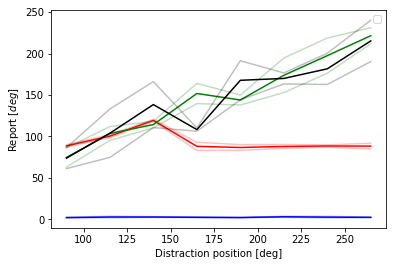

In [114]:
# reproduction of plot 5B in paper
plt.figure()
plt.xlabel(r"Distraction position [deg]")
plt.ylabel(r"Report [$deg$]")

# in the same graph, plot the report vs. distractor angle curves for the control case and the two disinhibition cases.
# Use the keyword label = ... for the legend

# control curves
# plot the averaged report value vs. the relative distractor angles
# add +- its std. (e.g. as thin, semi-transparent lines above and below)

plt.plot(distr_angles,report_averaged[0,:], 'b')
plt.plot(distr_angles, report_averaged[0,:]+report_std[0,:],'b',alpha = 0.25)
plt.plot(distr_angles, report_averaged[0,:]-report_std[0,:],'b',alpha = 0.25)

# ... same for disinhibition 1

plt.plot(distr_angles,report_averaged[1,:],'r')
plt.plot(distr_angles, report_averaged[1,:]+report_std[1,:],'r', alpha = 0.25)
plt.plot(distr_angles, report_averaged[1,:]-report_std[1,:],'r', alpha = 0.25)


# ... same for disinhibition 2

plt.plot(distr_angles,report_averaged[2,:],'g')
plt.plot(distr_angles, report_averaged[2,:]+report_std[2,:],'g', alpha = 0.25)
plt.plot(distr_angles, report_averaged[2,:]-report_std[2,:],'g', alpha = 0.25)


# ... same for disinhibition 3

#plt.plot(distr_angles,report_averaged[3,:],'k')
#plt.plot(distr_angles, report_averaged[3,:]+report_std[3,:],'k', alpha = 0.25)
#plt.plot(distr_angles, report_averaged[3,:]-report_std[3,:],'k', alpha = 0.25)


plt.legend()
plt.show()

4) Reproduce Fig. 5.C: extract the argmax of each of the $\theta_{report}$ curves that you computed in point 1 and plot these 4 values as a function of the corresponding variation of $G_{EI}$.

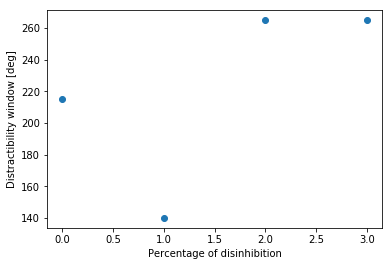

In [111]:
# plot Fig. 5.C

# extract distractibility window (argmax of report curve, see fig. 5 in the paper)
for i in range(len(disinhib_percentages)):
    distractibility_windows[i] = distr_angles[np.argmax(report_averaged[i,:])] 
    
# make the corresponding plot: distract. window against disinhibition percentage
plt.figure()
plt.plot( disinhib_percentages, distractibility_windows,"o")
plt.xlabel("Percentage of disinhibition")
plt.ylabel(r"Distractibility window [deg]")
plt.show()

5) Compare the plot you made in point 4 with the first one of exercise 5.3 (the graph correspondind to Fig. 2.B in the paper) and explain the similarity. (Max 5 lines)